<a href="https://colab.research.google.com/github/alfonso-uacj/ColabFiles/blob/main/Pra%CC%80ctica_21_Ejercicios_de_Normalizacion_al256111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. **¿Cómo afectó la normalización Min-Max a la distribución de los datos?**
-No se vio un cambio en los resultados en Shapiro-Wilk: 0.982 , parece que la normalizacion min-max no cambia la distribucion, los datosse mantienen solo en min-max se intercambian con 0 y 1. En min max se trato de clasificar los datos en la escala mencionado , por ejemplo en los datos originales 11.03 (0) seria el minimo y el maximo 14.83 (1). Asi, los valores cercanos a cero tienen menos grados de alcohol , los cercanos a uno mas alcohol y los que tengan a 0.5 tendrian un grado medio.
2. **¿Qué interpretas del p-valor antes y después de la normalización?**
-Conforme a lo anterior se ve que no mejora la normalidad, en la grafica vemos que no hay una curva que sea completamente normal y a momento de aplicar min-max sigue dando el mismo resultado (ahora re escalado a 0 y 1) pero siguiendo la misma distribucion, aunque cabe resaltar que no se ven outliers extremos en ambos datoa (antes o despues de normalidad). El resultado de p-valor sigue siendo 0.020, lo que es menor que 0.5 y se consideraria que no tienen distribucion normal.

   alcohol
0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
------------------------------------------------------------

Shapiro-Wilk: 0.982
Valor p: 0.020
------------------------------------------------------------

   alcohol_normalized
0            0.842105
1            0.571053
2            0.560526
3            0.878947
4            0.581579
------------------------------------------------------------

Shapiro-Wilk - datos normalizados: 0.982
Valor p - datos normalizados: 0.020
------------------------------------------------------------



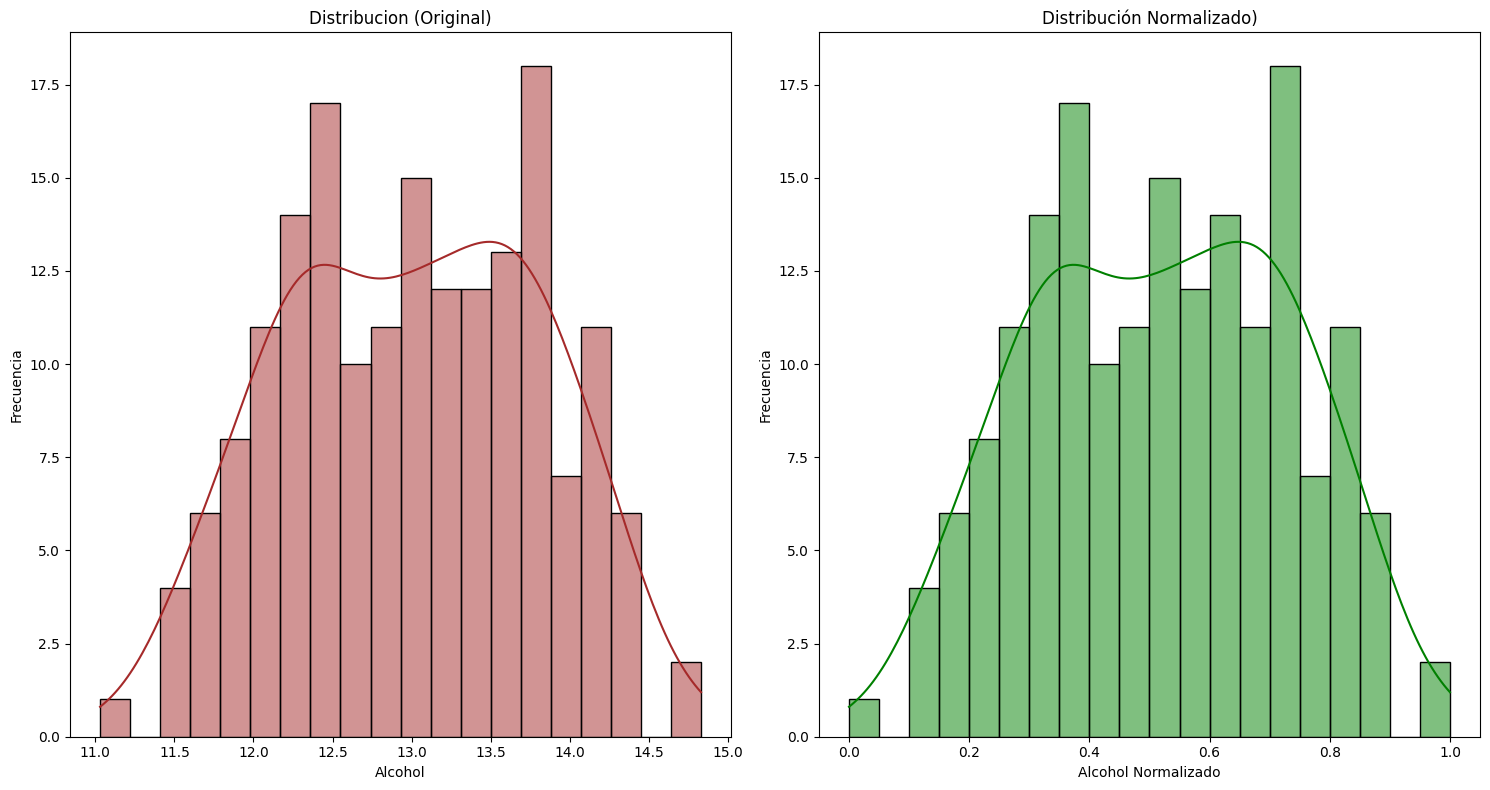

In [16]:
from sklearn.datasets import load_wine
import pandas as pd
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


#1. Cargar el dataset wine de sklearn.

# wine dataset
wine = load_wine()

# Convertir a DataFrame
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2. Seleccionar una de las características numéricas (por ejemplo, alcohol).
alcohol = df_wine[['alcohol']]

# imprimir filas iniciales
print(alcohol.head())
print("---" * 20 + "\n" )

# 3.Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.

# P Shapiro-Wilk
stat, p_value = shapiro(alcohol)

print(f'Shapiro-Wilk: {stat:.3f}')
print(f'Valor p: {p_value:.3f}')
print("---" * 20 + "\n" )

# 4.Aplicar la normalización Min-Max a los datos seleccionados.
#alcohol

#  Min-Max
scaler = MinMaxScaler()
alcohol_normalized = scaler.fit_transform(alcohol)

# DataFrame normalizado
df_alcohol_normalized = pd.DataFrame(alcohol_normalized, columns=['alcohol_normalized'])

# imprimir filas iniciales
print(df_alcohol_normalized.head())
print("---" * 20 + "\n" )

#5.Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

#  Shapiro-Wilk datos normalizados
stat2, p_value2 = shapiro(alcohol_normalized)

# Mostrar resultados
print(f'Shapiro-Wilk - datos normalizados: {stat2:.3f}')
print(f'Valor p - datos normalizados: {p_value2:.3f}')
print("---" * 20 + "\n" )

# Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.

# Crear nueva columna en el DataFrame
df_wine.loc[:, 'alcohol_normalized'] = alcohol_normalized

plt.figure(figsize=(15, 8))

# Histograma de los datos originales
plt.subplot(1, 2, 1)
sns.histplot(df_wine['alcohol'], kde=True, bins=20, edgecolor='black', color='brown')
plt.title('Distribucion (Original)')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')

# Histograma de los datos normalizados
plt.subplot(1, 2, 2)
sns.histplot(df_wine['alcohol_normalized'], kde=True, bins=20, edgecolor='black', color='green')
plt.title('Distribución Normalizado)')
plt.xlabel('Alcohol Normalizado')
plt.ylabel('Frecuencia')

# Ajuste del diseño
plt.tight_layout()
plt.show()



# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:

1.**¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**

-Sugue siendo la misma en ambos casos no es nomrmal, los datos de la derecha son menores , la forma no es simetrica solo cambio la escala pweo wl resultado de la curva como se puede ver en la grafica tiende a ser irregular.
2.	**¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**

La media se escala a que sea cero y la desviacion estandard a 1, el p valor es muy vajo lo que puede indicar que no es normal. Se puede decir que nos podria indicar cuatnos valores se alejan de su desviacion estandar depende si se aleja o se acerca a cero. Por ejemplo, en nuestro caso el primer resultado fue -0.562250 lo que indica que es un valor negativo e indicaria que esta por debajo del promedio de los datos en general alejandose de la media por debajo-



Shapiro-Wilk: 0.889
Valor p: 0.000
------------------------------------------------------------

   malic_acid_zscore
0          -0.562250
1          -0.499413
2           0.021231
3          -0.346811
4           0.227694
------------------------------------------------------------

Estadístico Shapiro-Wilk (Z-Score): 0.889
Valor p: 0.000


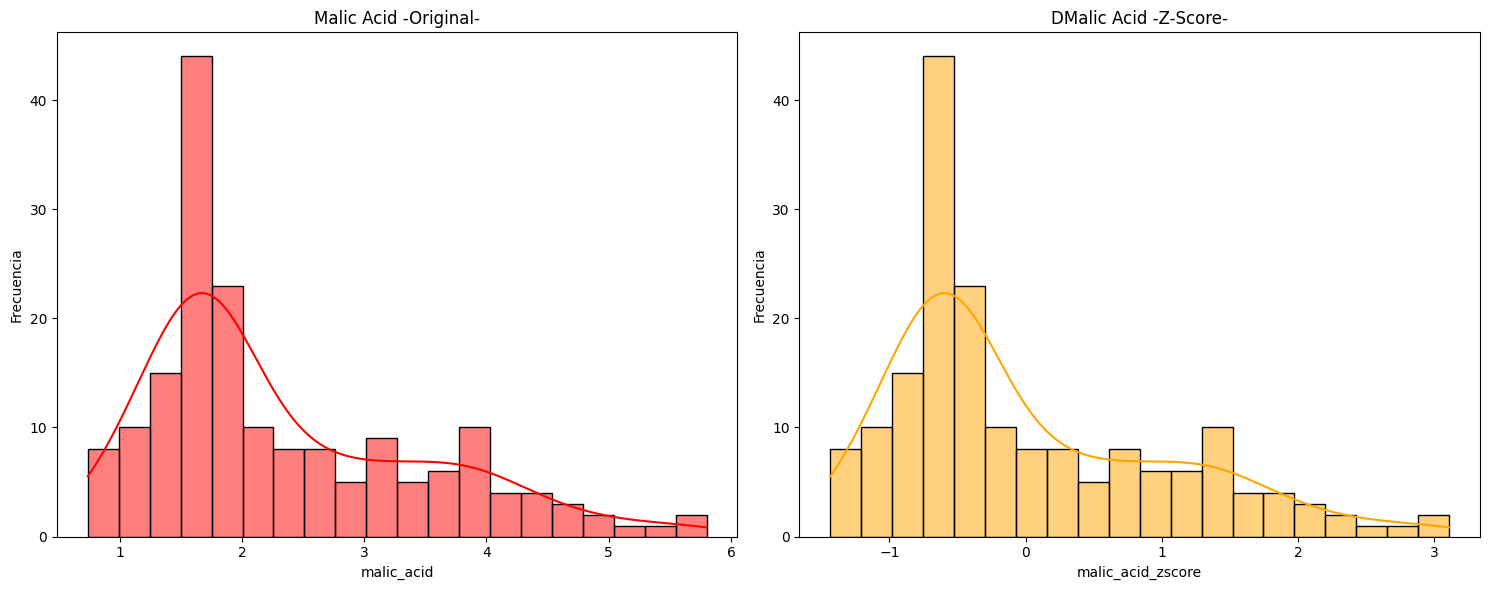

In [26]:
import pandas as pd
from sklearn.datasets import load_wine
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Cargar el dataset wine de sklearn.
# wine dataset
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# 2.Seleccionar una de las características numéricas (por ejemplo, malic_acid).
malic_acid_data = df_wine[['malic_acid']]

# 3.Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
stat, p_value = shapiro(malic_acid_data)

# Mostrar resultados
print(f"Shapiro-Wilk: {stat:.3f}")
print(f"Valor p: {p_value:.3f}")
print("---" * 20 + "\n" )

# 4. Aplicar la normalización Z-Score a los datos seleccionados.

# normalización Z-Score
scaler = StandardScaler()
malic_acid_zscore = scaler.fit_transform(malic_acid_data)

# Agregar columna malic_acid_zscore
df_wine['malic_acid_zscore'] = malic_acid_zscore

# Mostrar primeros valores
print(df_wine[['malic_acid_zscore']].head())
print("---" * 20 + "\n" )

# 5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.

# Realizar la prueba de normalidad sobre los datos normalizados
stat2, p_value2 = shapiro(df_wine['malic_acid_zscore'])

# Mostrar resultados
print(f"Estadístico Shapiro-Wilk (Z-Score): {stat:.3f}")
print(f"Valor p: {p_value:.3f}")

# 6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.

# Graficar los datos originales y normalizados
plt.figure(figsize=(15, 6))

#  malic_acid original
plt.subplot(1, 2, 1)
sns.histplot(df_wine['malic_acid'], kde=True, bins=20, edgecolor='black', color='red')
plt.title('Malic Acid -Original-')
plt.xlabel('malic_acid')
plt.ylabel('Frecuencia')

# malic_acid normalizado con Z-Score
plt.subplot(1, 2, 2)
sns.histplot(df_wine['malic_acid_zscore'], kde=True, bins=20, edgecolor='black', color='orange')
plt.title('DMalic Acid -Z-Score-')
plt.xlabel('malic_acid_zscore')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	**¿Cómo afectó la transformación logarítmica a la distribución de los datos?**

-Los valores en la distribucion transformada visualmete se hace mas asimetrica que con la original, viendo que los datos log se tienden a la rerecha en al grafica, ya que los datos originales eran normales.

2.	**¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**

-El p-valor original es mas alto  0.146 que el log 0.000, lo cual puede indicar que el original tiende a la normalidad.


   datos_originales  datos_transformados
0          1.219824             0.198707
1          1.984511             0.685373
2          1.689536             0.524454
3          1.267710             0.237212
4          2.705973             0.995462
------------------------------------------------------------

Shapiro originales: 0.981
Valor p: 0.146
------------------------------------------------------------

Shapiro log: 0.675
Valor p: 0.000
------------------------------------------------------------



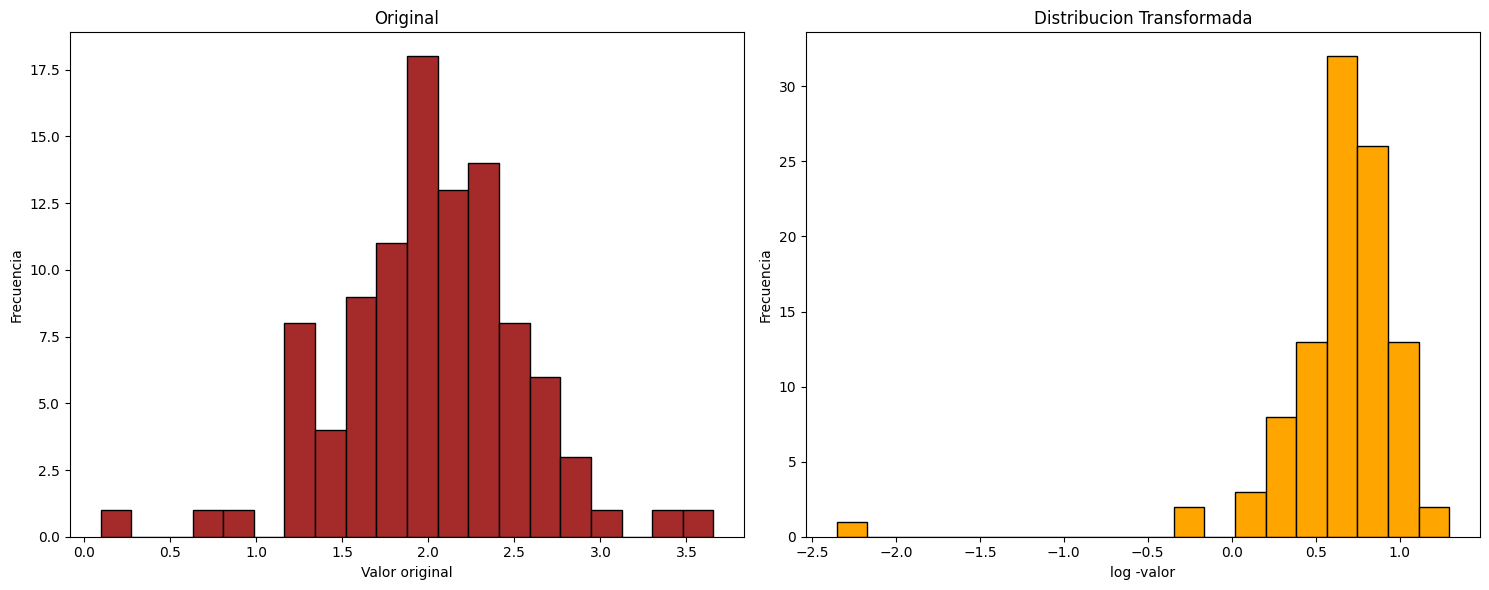

In [45]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# 1. Cargar un conjunto de datos aleatorios generados con numpy.
np.random.seed(50)  #Esto es para que genere los mismos resultados aleatorios cuando se corra el script
datos = np.random.normal(loc=2, scale=0.5, size=100)

# 2. Aplicar una transformación logarítmica (np.log) a los datos.
log_tran = np.log(datos)

# Crear un DataFrame para ver los resultados
df = pd.DataFrame({'datos_originales': datos, 'datos_transformados': log_tran})

# Mostrar primeros valores
print(df.head())
print("---" * 20 + "\n" )

# 3.Realizar una prueba de normalidad sobre los datos originales y transformados.

stat1, p_1 = shapiro(datos)
stat2, p_2 = shapiro(log_tran)

print(f"Shapiro originales: {stat1:.3f}")
print(f"Valor p: {p_1:.3f}")
print("---" * 20 + "\n" )

print(f"Shapiro log: {stat2:.3f}")
print(f"Valor p: {p_2:.3f}")
print("---" * 20 + "\n" )

# 4. Graficar los datos originales y transformados utilizando matplotlib.

#  histogramas
plt.figure(figsize=(15, 6))

# Histograma original
plt.subplot(1, 2, 1)
plt.hist(datos, bins=20, edgecolor='black',  color='brown')
plt.title('Original')
plt.xlabel('Valor original')
plt.ylabel('Frecuencia')

# Histograma - log
plt.subplot(1, 2, 2)
plt.hist(log_tran, bins=20, edgecolor='black', color='orange')
plt.title('Distribucion Transformada')
plt.xlabel('log -valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	**¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?**

-Podemos en la grafica  ver que los datos se normalizaron un poco mas, el p - valor por ejemlo aumento mas lo que acerca a la normalidad los datos.

2.	**¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?**

-Reduce la dispercion de los datos , los valores en el extremo los traa de meter mas a la media , la distribucion en la grafica es mas homogenea y no tan dispersa.


Original: 0.8360, p-valor: 3.713e-09
------------------------------------------------------------

Raiz cuadrada: 0.9634, p-valor: 7.083e-03
------------------------------------------------------------



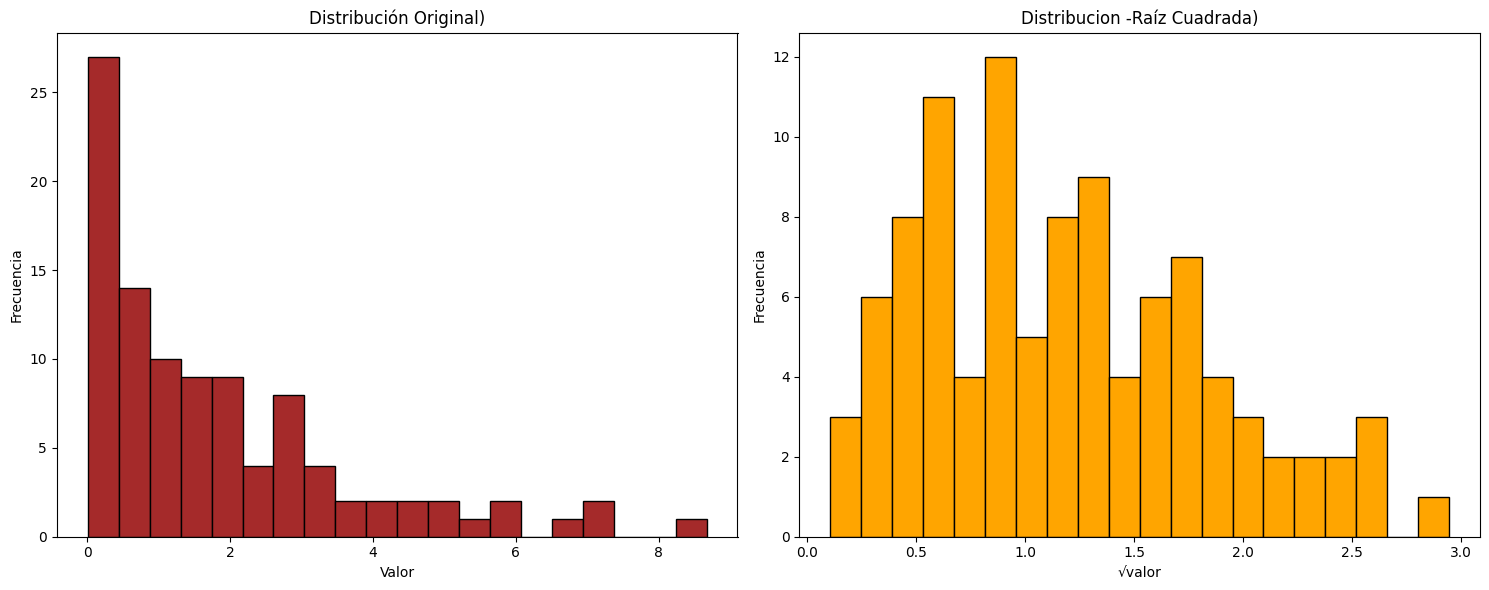

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# 1. Generar datos aleatorios positivos
np.random.seed(42)
datos = np.random.exponential(scale=2.0, size=100) # se usa ahora exponencial

# 2. Aplicar transformación de raíz cuadrada
datos_cuad = np.sqrt(datos)

# 3. Realizar una prueba de normalidad sobre los datos originales y transformados.
stat_original, p_original = shapiro(datos)
stat_sqrt, p_sqrt = shapiro(datos_cuad)

# mostrar

print(f"Original: {stat_original:.4f}, p-valor: {p_original:.3e}")
print("---" * 20 + "\n" )

print(f"Raiz cuadrada: {stat_sqrt:.4f}, p-valor: {p_sqrt:.3e}")
print("---" * 20 + "\n" )

# 4. Graficar histogramas
plt.figure(figsize=(15, 6))

# Histograma original
plt.subplot(1, 2, 1)
plt.hist(datos, bins=20, edgecolor='black', color='brown')
plt.title('Distribución Original)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma transformado (raíz cuadrada)
plt.subplot(1, 2, 2)
plt.hist(datos_cuad, bins=20, edgecolor='black', color='orange')
plt.title('Distribucion -Raíz Cuadrada)')
plt.xlabel('√valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	**¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

-Se volvio mas uniforme segun la grafica, mas parecida a una campana. El  p-valor se acerca mas a la normalidad a comparacion de los datos originales.

2.	**¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**

-Es un valor que calcual Box.Cox para acercar lo mas posible a una distribucion normal una serie de datos, obteniendolo para calcular sobre el el resultado necesario. En el caso del ejemplo encontro λ (lambda) usado por Box-Cox: 0.311 que trata de corregir sesgos moderados.

📊 Resultados de la prueba de normalidad:
Original: 0.850, p-valor: 1.163e-08
Box-Cox: 0.994, p-valor: 9.332e-01
λ (lambda) usado por Box-Cox: 0.311


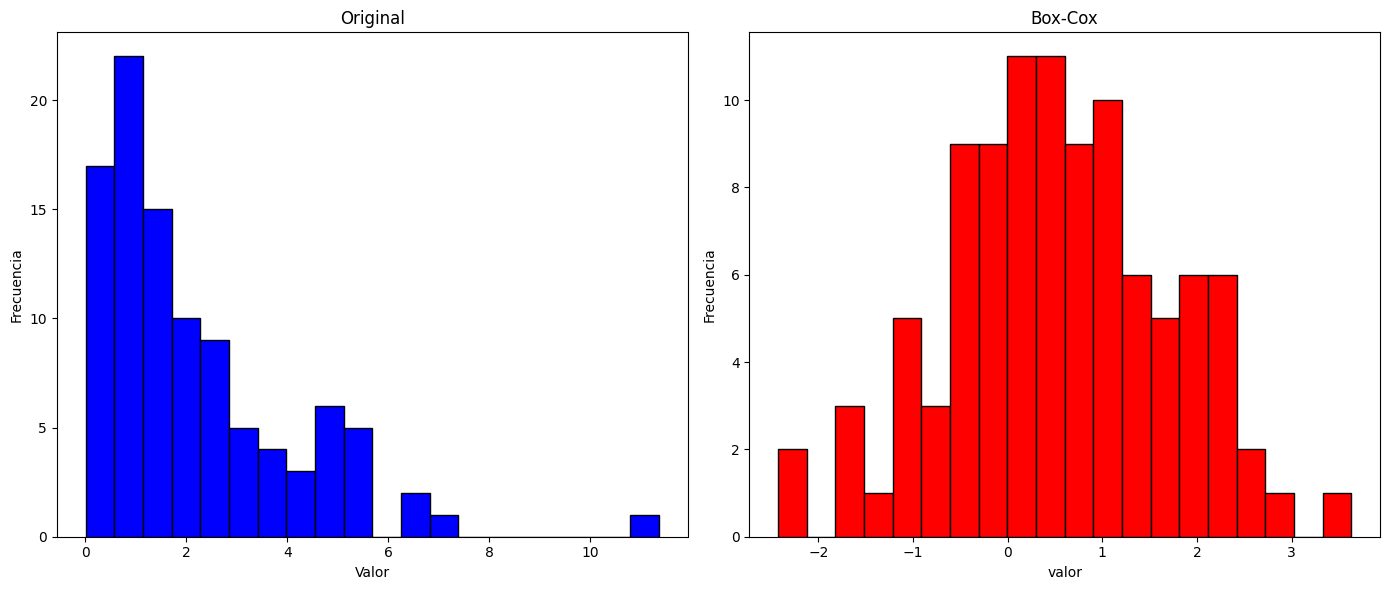

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, shapiro

# 1. Cargar un conjunto de datos aleatorios generados con numpy.
np.random.seed(50)
datos = np.random.exponential(scale=2.0, size=100)

# 2. Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
datos_boxcox, lambda_boxcox = boxcox(datos)

# 3. Realizar una prueba de normalidad sobre los datos originales y transformados.
stat_original, p_original = shapiro(datos)
stat_boxcox, p_boxcox = shapiro(datos_boxcox)

# 4. Resultados
print("📊 Resultados de la prueba de normalidad:")
print(f"Original: {stat_original:.3f}, p-valor: {p_original:.3e}")
print(f"Box-Cox: {stat_boxcox:.3f}, p-valor: {p_boxcox:.3e}")
print(f"λ (lambda) usado por Box-Cox: {lambda_boxcox:.3f}")


# 6. Graficar datos originales y transformados
plt.figure(figsize=(14, 6))

# Histograma original
plt.subplot(1, 2, 1)
plt.hist(datos, bins=20, edgecolor='black', color='blue')
plt.title('Original')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma transformado (Box-Cox)
plt.subplot(1, 2, 2)
plt.hist(datos_boxcox, bins=20, edgecolor='black', color='red')
plt.title('Box-Cox')
plt.xlabel('valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()